In [1]:
print("welcome to data analysis.")

welcome to data analysis.


In [2]:
run ./scripts/analysis_scripts.py

In [3]:
minimum_path = './computational-results-minimum/results_datatable'
additive_faces_path = './computational-results-additive-faces/results_datatable'
objective_zero_path = './computational-results-objective-zero/results_datatable'
objective_one_percent_path = './computational-results-objective-one-percent/results_datatable/'

In [8]:
path = minimum_path
df = generate_dataframe(path,stats='arithmetic_mean')

In [9]:
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_dfs_constant_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),5.609764,26.131734,5.791852,38.320046,25.595043,34.716032,28.557523,9.620252,1989.423926,5.958211,22.21913


In [29]:
def performance_profile_plot(df, time_out = 3600, tau_max = 100, log_scale = True):
    total_instances = df.shape[0]
    best_time = df.min(axis = 1).to_list()
    new_df = pd.DataFrame()
    new_df['instances'] =  df['instances']
    
    def counttime(l,threshold):
        return sum(1 if v<=threshold else 0 for v in l)
    
    for col in df.columns:
        if col == 'instances':
            continue
        if log_scale:
            new_df[col] = [math.log(df[col][i]/best_time[i]) if df[col][i] < time_out else math.log(tau_max) for i in range(len(best_time))]
        else:
            new_df[col] = [df[col][i]/best_time[i] if df[col][i] < time_out else tau_max for i in range(len(best_time))]
    
    plot_df = pd.DataFrame()
    if log_scale:
        X=[float(0+i*0.1) for i in range(int(math.log(tau_max)*10+1))]
    else:
        X=[float(1+i*0.1) for i in range((tau_max-1)*10+1)]
    plot_df['tau'] = X
    for col in df.columns:
        if col == 'instances':
            continue
        plot_df[col] = [float(counttime(new_df[col], xx))/total_instances for xx in X]
    return plot_df
    

In [42]:
plot_df=performance_profile_plot(df,log_scale = True, tau_max = 1000)

In [45]:
plot_df.columns[1:]

Index([u'sbb_bb_constant_bound', u'sbb_bfs_mixed_bound',
       u'sbb_bfs_constant_bound', u'sbb_dfs_lp_bound', u'sbb_bb_lp_bound',
       u'sbb_dfs_mixed_bound', u'sbb_bfs_lp_bound', u'naive_computation',
       u'mip_solver', u'sbb_dfs_constant_bound', u'sbb_bb_mixed_bound'],
      dtype='object')

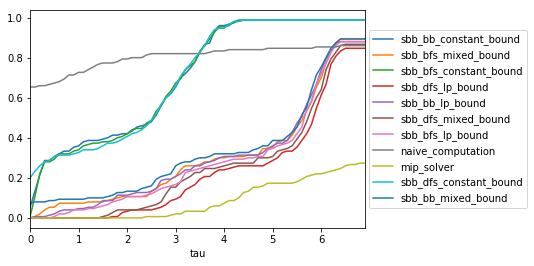

In [61]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()